In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt 
import pandas as pd
import sklearn
from sklearn import datasets
import numpy as np

/root/.local/share/virtualenvs/machine-learning-3gRytY6Y/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
iris = load_iris()

In [ ]:
X = iris.data
y = iris.target

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [5]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=2)

In [6]:
from torch.utils.data import TensorDataset,DataLoader

#X_train=torch.from_numpy(X_train).float()
#means = X_train.mean(dim=1, keepdim=True)
#stds = X_train.std(dim=1, keepdim=True)
#X_train_norm = (X_train - means) / stds

X_train_norm=torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [7]:

import torch.nn.functional as F
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = nn.Softmax(dim=1)(self.layer2(x))
        return x

In [8]:
input_size = X_train_norm.size(-1)
hidden_size = 50
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [9]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch) # generate predictions
        loss = loss_fn(pred, y_batch) # Calculate loss
        loss.backward() # Compute gradients
        optimizer.step() # Update parameters using gradients
        optimizer.zero_grad() #Reset the gradients to zero
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

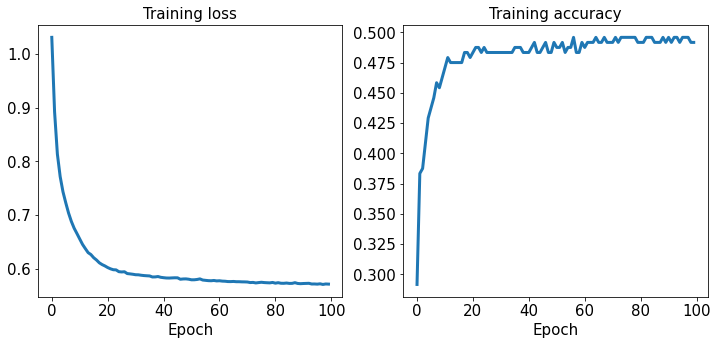

In [11]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [12]:

X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9667
